# Project OS

## 120 years of Olympic history: athletes and results
#### - basic bio data on athletes and medal results from Athens 1896 to Rio 2016

## Uppvärmning athlete_events data

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [71]:
players_os = pd.read_csv("Data/athlete_events.csv")
# players_os.info()
players_os.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### - a. hur många länder som är med i datan?

In [55]:
counties = players_os["NOC"].unique()
len_counties = len(players_os["NOC"].unique())
print(f"There are {len_counties} counties in the data")

There are 230 counties in the data


### - b. vilka länder är med? (förkortningarna räcker)

In [56]:
print(f"These contries are: {counties}")

These contries are: ['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 

### - c. vilka sporter är med?


In [57]:
sports = players_os["Sport"].unique()
print(f"The sports include: {sports}")

The sports include: ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


### - d. vilka medaljtyper finns det?

In [58]:
medal_types = players_os["Medal"].unique()
print(f"The medal types are: {medal_types}")

The medal types are: [nan 'Gold' 'Bronze' 'Silver']


### - e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

In [59]:
mean_age = players_os["Age"].mean()
median_age = players_os["Age"].median()
min_age = players_os["Age"].min()
max_age = players_os["Age"].max()
std_age = players_os["Age"].std()

print(f"The mean age in the data is {mean_age}; the midian age is {median_age}; the minimum and maximum are {min_age} and {max_age}; the standard deviation is {std_age}")

The mean age in the data is 25.556898357297374; the midian age is 24.0; the minimum and maximum are 10.0 and 97.0; the standard deviation is 6.393560847035813


### - f. utforska datan vidare med egna frågor

- The average age of male and females

In [88]:
male_average = players_os["Age"][players_os["Sex"]=="M"].mean().astype(int)
female_average = players_os["Age"][players_os["Sex"]=="F"].mean().astype(int)
print(f"The average age of male is {male_average} and the average age of female is {female_average}.")

The average age of male is 26 and the average age of female is 23.


- How many cities hosted the Olympic Games.

In [93]:
city = players_os["City"].unique()
city_number = len(city)
print(f"There are {city_number} cities hosted olympic games in the history.")

There are 42 cities hosted olympic games in the history.


- The most Olympic gold medalists.

In [128]:
Medal = players_os["Name"][players_os["Medal"]=="Gold"]
first_Medal = Medal.value_counts().head(1)
print(f"The most Olympic gold medalists is {first_Medal}")

The most Olympic gold medalists is Michael Fred Phelps, II    23
Name: Name, dtype: int64


- The younest and oldest player won the gold in Olympic Games in the history.

In [158]:
youngest_gold = players_os["Age"][players_os["Medal"]=="Gold"].min().astype(int)
oldest_gold = players_os["Age"][players_os["Medal"]=="Gold"].max().astype(int)

print(f"The younest player won the gold is {youngest_gold} years old.")
print(f"The oldest player won the gold is {oldest_gold} years old.")

The younest player won the gold is 13 years old
The oldest player won the gold is 64 years old


### - g.cirkeldiagram över könsfördelningen

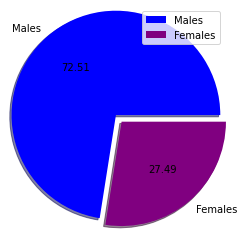

In [219]:
males = players_os["Sex"]=="M"
males = males.value_counts("True")

plt.pie(males, labels=("Males", "Females"), colors=("blue","purple"), radius=1.2, explode = (0, 0.1), autopct="%.2f", shadow=True)
plt.legend()

### - h. stapeldiagram över topp 10 länder som tagit flest medaljer


[Text(0.5, 1.0, 'Top 10 countrie take the most medals')]

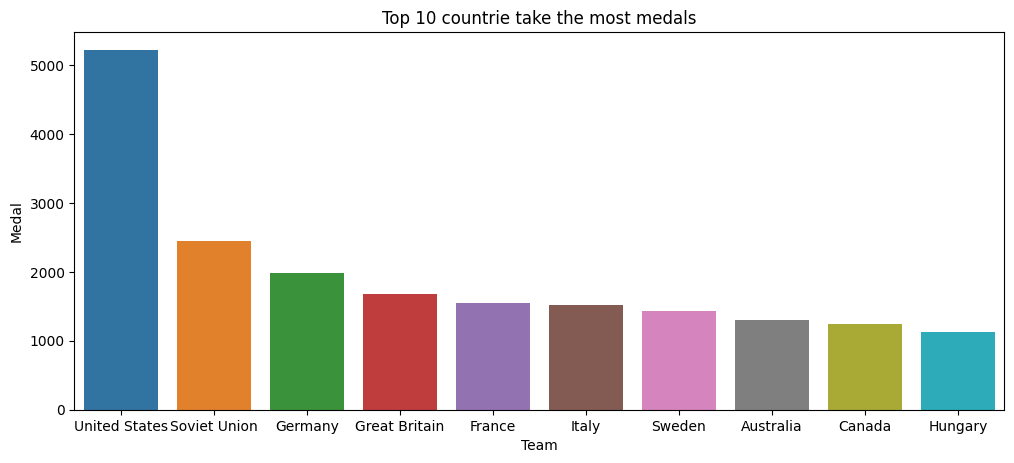

In [287]:
county_medal = players_os.groupby("Team").count()
county_medal = county_medal.sort_values("Medal", ascending=False).head(10).reset_index()

fig = plt.subplots(dpi=100, figsize=(12,5))
sns.barplot(data=county_medal, x="Team", y="Medal").set(title="Top 10 countrie take the most medals")

### - i. plotta gärna fler saker som är intressant.


- Cities which hosted more than 1 times Olympic games in the history

[Text(0.5, 1.0, 'Cities which hosted more than 1 times Olympic games in the history'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Times')]

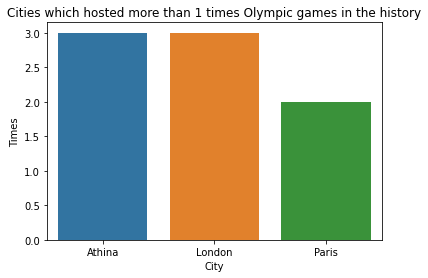

In [335]:
cities_os = players_os[["Year", "City"]]
cities_os = cities_os.drop_duplicates("Year")
cities_os = cities_os["City"].value_counts().head(3).reset_index()

sns.barplot(data=cities_os, x="index", y="City").set(title="Cities which hosted more than 1 times Olympic games in the history", xlabel="City", ylabel="Times")

- Hisgram of China gold medal (numbers) in Olympic games (1984 - 2016)

[Text(0.5, 1.0, 'China gold medal numbers in Olympic games'),
 Text(0, 0.5, 'Number of gold medal')]

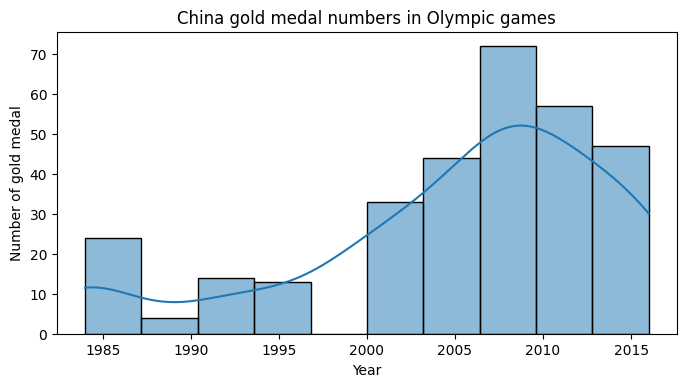

In [398]:
china_gold = players_os["Year"][players_os["Team"]=="China"][players_os["Medal"]=="Gold"].reset_index()

fig = plt.subplots(dpi=100, figsize=(8,4))
sns.histplot(china_gold, x="Year", kde=True).set(title="China gold medal numbers in Olympic games", ylabel="Number of gold medal")